In [6]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Page segmentation modes:
    
    0. Orientation and script detection (OSD) only.

    1. Automatic page segmentation with OSD.

    2. Automatic page segmentation, but no OSD, or OCR. (not implemented)

    3. Fully automatic page segmentation, but no OSD. (Default)

    4. Assume a single column of text of variable sizes.

    5. Assume a single uniform block of vertically aligned text.

    6. Assume a single uniform block of text.

    7. Treat the image as a single text line.

    8. Treat the image as a single word.

    9. Treat the image as a single word in a circle.

    10. Treat the image as a single character.

    11. Sparse text. Find as much text as possible in no particular order.

    12. Sparse text with OSD.

    13. Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

OCR Engine modes:

    0. Legacy engine only.
    1. Neural nets LSTM engine only.
    2. Legacy + LSTM engines.
    3. Default, based on what is available.

In [2]:
img = cv2.imread("israelenses-munique.jpg")
custom_config = r'--oem 3 --psm 1'
pytesseract.image_to_string(img, config=custom_config)

' \n\n \n\nTEMPO EM SAO PAULO\n\nInstivol com chuvas esparsas\n\ndo periods, ‘Temperatura estivel, Pagina 39\n\nno deoorrer\n\nO ESTADO DE S.PAULO\n\nJULIO MESQUITA (1891-1927) - JULIO DE MESQUITA FILHO (1927-1969) - FRANCISCO MESQUITA (1927-1969)\n\n \n\nCapital e Interior de Sao Paulo Cr$ 0,60\n\nANO 93\n\nQUARTA-FEIRA, 6 DE SETEMBRO DE 1972\n\n \n\nIsraelenses ch\n\nMédieci\nassina\n- indulto\n\nDa Sucursal de Brasilia\n@ do Serviso Local |\n\n \n\n \n\n \n\n© presidente: Médici assinou,\nontem, deereto que considera\nindultados os sentenciados pri-\nmarios, conderiados a penas de\nJe prisio e que te\nn mprido, com boa con-\nduta, no minimo um tergo da\npena até o dia 7 de setembro,\nA medida nao beneficia os con-\ndenados por crime contra a Se- *|\n\n \n  \n\n \n\nsuranga Nacional ¢ por trafico\nde enlorpecentes.\nO decreto presidencial foi\n\n \n\nmais tim ato de homenagem ao\nSesquticentenario da_Indepen-\ndencla, Os dirigentes de estabe-\nlecimentos penais devem en\nviar oficio,

In [14]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [15]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [16]:
custom_config = r'--oem 3 --psm 1'
pytesseract.image_to_string(gray, config=custom_config)

' \n\n \n\n \n\n \n\n-~ ~-JULIO-DE MESQUITA-NETO\n“BIRETOR RESPONSAVEL\n\n;\n\nv\n\nODES.PAULO -=\n\no “\nTEMPO EM SAO PAULO 0 : E S\nAnatével, chu pela manhf, passando a nublato o\n’ RO periodo, em sensivel declinio, Pég. 41.\n\n \n\n \n\n \n\ni ‘Falando & imprensa, p05 | Luanda, onde tentou a media | mica a _ descobrindo“s causa. do jantard cidos.\n° A | percorrer trés Extados com a | cao enite or lideres dor mo. | devils: inefiees diane de a ohccie ns sales aos Je- | problema num fio solto,.| nautas jantaréo a bordo, . \' |\ne EVE | missio de promover a politica | vimentos de libertacko, num | tuacdo caética.emt Lisbon —¢@ | SiS adores. “A: EXP 0880 | Ticaram suas pontas com | Stafford c Slayton regres- | As novas decisées vi-\nexterna da Casa Branca, Kis- | ¢sforco para evitar a eclosio | 0 governo de Bonn & Provocou  queimaduras | 114 pandagem pléstica. "| Sato 4 Apolo ds 18 e 31. | sam diminuir o deficit\n\n \n\n \n\n;JULIO MESQUITA (1801 - 1927) + JULIO DE: MESQUITA, FILHO (1927

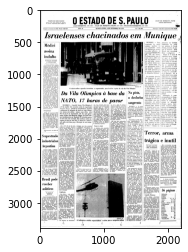

In [7]:
plt.imshow(img)
plt.show()

In [8]:
img2 = cv2.imread("18-jun-1974.jpg")
custom_config = r'--oem 3 --psm 1'
pytesseract.image_to_string(img2, config=custom_config)

' \n\n \n\n \n\n \n\n-~ ~-JULIO-DE MESQUITA-NETO\n“BIRETOR RESPONSAVEL\n\n;\n\nv\n\nODES.PAULO -=\n\no “\nTEMPO EM SAO PAULO 0 : E S\nAnatével, chu pela manhf, passando a nublato o\n’ RO periodo, em sensivel declinio, Pég. 41.\n\n \n\n \n\n \n\ni ‘Falando & imprensa, p05 | Luanda, onde tentou a media | mica a _ descobrindo“s causa. do jantard cidos.\n° A | percorrer trés Extados com a | cao enite or lideres dor mo. | devils: inefiees diane de a ohccie ns sales aos Je- | problema num fio solto,.| nautas jantaréo a bordo, . \' |\ne EVE | missio de promover a politica | vimentos de libertacko, num | tuacdo caética.emt Lisbon —¢@ | SiS adores. “A: EXP 0880 | Ticaram suas pontas com | Stafford c Slayton regres- | As novas decisées vi-\nexterna da Casa Branca, Kis- | ¢sforco para evitar a eclosio | 0 governo de Bonn & Provocou  queimaduras | 114 pandagem pléstica. "| Sato 4 Apolo ds 18 e 31. | sam diminuir o deficit\n\n \n\n \n\n;JULIO MESQUITA (1801 - 1927) + JULIO DE: MESQUITA, FILHO (1927

In [9]:
img3 = cv2.imread("11-may-1982.jpg")
custom_config = r'--oem 3 --psm 1'
pytesseract.image_to_string(img3, config=custom_config)

' \n\n \n\nTEMPO EM SAO PAULO\n\nBom, nebulosidade vuriével au-\nmentando no periodo. Pagina 26\n\nCapital e Interior de SAo Paulo — Cr$ 50,00\n\n \n\n0 ESTADO DE S. PAULO\n\nJULIO MESQUITA (a9 + 1927)\n\nJULIO DE MESQUITA FILHO (1927 . 1969)\n\nFRANCISCO MESQUITA (1927 - 1969)\n\n \n\nANO 103: TERCA-FEIRA, 11 DE MAIO DE 1982\n\nN° 32.872\n\nJULIO DE MESQUITA NETO\n\nDIRETOR RESPONSAVEL\n\nAssinatura anual Cr$ 9.800,00\n\n \n\n  \n   \n\nSoldados argentinos reabastecem um helicéptero, durante os exercicios de defesa\n\n» bp\n\nJair Soares garante\nque o déficit acabou\n\nO ministro Jair Soares,| 4 promessa, reafirmada\nque deixou ontem a Previ- | ainda ontem, em Brasilia,\n\ndéncia Social, passando o\ncargo para Hélio Beltrao\n(ver abaixo), em mesa-\nredonda promovida pelo\nEstado e Jornal da Tarde,\ntentou esquivar-se das per-\nguntas diretas sobre a cri-\nse no setor, mas referiu-se\n\nde que a situacdo financei-\nra do Ministério ficara\nequilibrada até o fim do\nano, voltando també

In [10]:
img4 = cv2.imread("14-apr-1993.jpg")
custom_config = r'--oem 3 --psm 1'
pytesseract.image_to_string(img4, config=custom_config)

' \n\nr\n\nSP, Ad, MG, PR e SC\nCr§ 15.000,00\n\nTADO DE S. PAULO\n\nJulio Mesquita (1891-1927)\n\nANO 114\n\nJulio de Mesquita Filho (1927-1969)\nQUARTA-FEIRA, 14 DE ABRIL DE 1993\n\nJULIO DE MESQUITA NETO\n\nDiretor\nResponsavel\n\nFrancisco Mesquita (1927-1969)\nN° 36,337\n\n \n\nProtasio Nano/A\n\n \n\n   \n\n \n\nCasa alegoérica\n\nSebastido Marcos cons-\ntruiu sua casa com os restos\ndas alegorias da Gavides da\nFiel, embaizo do Viaduto An-\n\n \n\ntartica, onde funciona a ofi-\ncina de aderegos da escola.\nMais de 40 dias depois do car-\nnaval, toneladas de material\n\nReuniao ministerial vai\ndiscutir plano de governo\n\nO presidente Itamar Fran-\n¢o convocou ontem 4 noite\numa reuniéo ministerial pa-\nrao dia 24. O encontro exami-\nnara o programa de acao do\ngoverno. Itamar pediu aos\nministros que n&o saiam do\n\n \n\nPais enquanto o projeto nio\nestiver definido. Mas avisou\nque nao havera congelamen-\nto nem outras “medidas Tie-"\nrodicas”. O programa tem co-\nmo base 0 eq

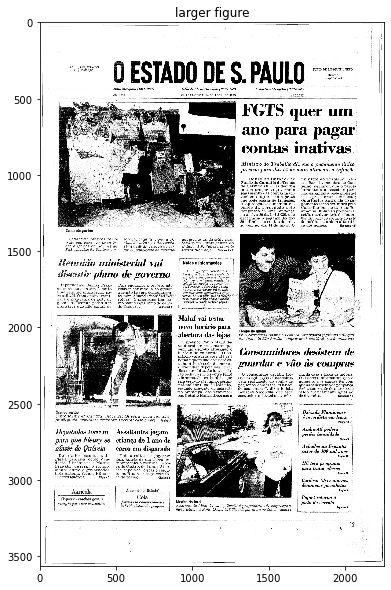

In [13]:
# change the figure size
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(img4, interpolation='none')
ax3.set_title('larger figure')

plt.show()

plt.show()